<a href="https://colab.research.google.com/github/tousif47/ARIMA-data-science-test/blob/main/Coop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dropping unnecessary columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

# Loading Dataset...
raw_data = pd.read_csv("/content/drive/MyDrive/Coop/rl_4months.csv", low_memory = False)

# Dropping MOSAIC data
raw_data.drop("MOSAICGroup", inplace = True, axis = 1)
raw_data.drop("MOSAICGroupDescription", inplace = True, axis = 1)
raw_data.drop("MOSAICType", inplace = True, axis = 1)
raw_data.drop("MOSAICTypeDescription", inplace = True, axis = 1)

# Dropping various label data (last 5 columns)
raw_data.drop("eko", inplace = True, axis = 1)
raw_data.drop("organic", inplace = True, axis = 1)
raw_data.drop("krav", inplace = True, axis = 1)
raw_data.drop("fair_trade", inplace = True, axis = 1)
raw_data.drop("msc", inplace = True, axis = 1)
raw_data.drop("no_lactose", inplace = True, axis = 1)

# Dropping all columns with "ItemName"
raw_data.drop("ItemCategoryAreaName", inplace = True, axis = 1)
raw_data.drop("ItemCategoryGroupName", inplace = True, axis = 1)
raw_data.drop("ItemCategoryTeamName", inplace = True, axis = 1)
raw_data.drop("ItemCategoryName", inplace = True, axis = 1)
raw_data.drop("ItemSubCategoryName", inplace = True, axis = 1)
raw_data.drop("ItemSegmentName", inplace = True, axis = 1)
raw_data.drop("ItemSubSegmentName", inplace = True, axis = 1)

# More dropping
raw_data.drop("DominantBuyingPowerClass", inplace = True, axis = 1)
raw_data.drop("hourOfDay", inplace = True, axis = 1)
raw_data.drop("minuteOfHour", inplace = True, axis = 1)
raw_data.drop("lineItemAmount", inplace = True, axis = 1)
raw_data.drop("lineItemAmountExclVat", inplace = True, axis = 1)
raw_data.drop("discountAmountExclVat", inplace = True, axis = 1)
raw_data.drop("CoopOnlineYN", inplace = True, axis = 1)

raw_data.drop("receiptKey", inplace = True, axis = 1)
raw_data.drop("lineItemCostExclVat", inplace = True, axis = 1)
raw_data.drop("store", inplace = True, axis = 1)
raw_data.drop("customerId", inplace = True, axis = 1)
raw_data.drop("householdId", inplace = True, axis = 1)
raw_data.drop("ItemSubSegmentID", inplace = True, axis = 1)
raw_data.drop("ItemSegmentID", inplace = True, axis = 1)
raw_data.drop("ItemSubCategoryID", inplace = True, axis = 1)
raw_data.drop("ItemCategoryID", inplace = True, axis = 1)
raw_data.drop("ItemCategoryTeamID", inplace = True, axis = 1)
raw_data.drop("ItemCategoryGroupID", inplace = True, axis = 1)
raw_data.drop("ItemCategoryAreaID", inplace = True, axis = 1)
raw_data.drop("Brand", inplace = True, axis = 1)

print(raw_data)

            DayDate  quantity  ItemID
0        2020-02-05       1.0  277403
1        2020-02-05       3.0     322
2        2020-02-05       0.0     322
3        2020-02-05       1.0  303321
4        2020-02-05       1.0  601635
...             ...       ...     ...
3221224  2020-05-31       1.0  198267
3221225  2020-05-31       0.0  274768
3221226  2020-05-31       1.0  274768
3221227  2020-05-31       0.0  303199
3221228  2020-05-31       1.0  303199

[3221229 rows x 3 columns]


In [ ]:
# Finding the popularity from the amount of each ItemID has been present in the dataset
popularity = raw_data.ItemID.value_counts()
result = popularity.reset_index()

print(result)

        index  ItemID
0       64582   18309
1      300082   17683
2       10087   16888
3       46877   14966
4       61960    9093
...       ...     ...
20593   85915       1
20594  646795       1
20595  288055       1
20596   85916       1
20597  335028       1

[20598 rows x 2 columns]


In [ ]:
# Top 5 most popular products
topFive = result.head(5)

print(topFive)

    index  ItemID
0   64582   18309
1  300082   17683
2   10087   16888
3   46877   14966
4   61960    9093


In [ ]:
# Selecting all the rows by ItemID 64582
new_data = raw_data[raw_data["ItemID"] == 64582]

print(new_data)

            DayDate  quantity  ItemID
1250     2020-03-18     0.700   64582
1251     2020-03-13     0.662   64582
1252     2020-02-07     0.938   64582
1448     2020-02-24     0.586   64582
4631     2020-04-07     0.224   64582
...             ...       ...     ...
3219788  2020-05-26     0.552   64582
3219876  2020-05-30     0.734   64582
3219877  2020-05-23     0.444   64582
3221044  2020-05-28     0.852   64582
3221100  2020-05-29     0.850   64582

[18309 rows x 3 columns]


In [ ]:
new_data.dtypes

DayDate      object
quantity    float64
ItemID        int64
dtype: object

In [ ]:
new_data["DayDate"] = pd.to_datetime(new_data["DayDate"])
new_data.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DayDate     datetime64[ns]
quantity           float64
ItemID               int64
dtype: object

In [ ]:
sort_data = new_data.sort_values(by = "DayDate")
sort_data.drop("ItemID", inplace = True, axis = 1)
sort_result = sort_data.reset_index()
sort_result.drop("index", inplace = True, axis = 1)

print(sort_result)

         DayDate  quantity
0     2020-02-01     0.454
1     2020-02-01     0.912
2     2020-02-01     1.220
3     2020-02-01     0.000
4     2020-02-01     0.652
...          ...       ...
18304 2020-05-31     0.970
18305 2020-05-31     1.028
18306 2020-05-31     0.338
18307 2020-05-31     0.656
18308 2020-05-31     0.728

[18309 rows x 2 columns]


In [ ]:
# Please ignore this part at the moment, I will explain during presentation
sum_data = sort_data.loc[sort_data["DayDate"] == "2020-03-31", "quantity"].sum()
print(sum_data)

158.536


In [ ]:
final_data = pd.read_csv("/content/drive/MyDrive/Coop/newsort_data.csv", low_memory = False)
final_data = final_data.set_index("DayDate")

print(final_data)

            tot_quantity
DayDate                 
2020-02-01        45.352
2020-02-02        44.716
2020-02-03       136.982
2020-02-04       120.726
2020-02-05        91.600
2020-02-06        90.130
2020-02-07       160.482
2020-02-08        72.342
2020-02-09        78.706
2020-02-10       146.759
2020-02-11       133.152
2020-02-12        92.538
2020-02-13       111.094
2020-02-14       109.028
2020-02-15        72.160
2020-02-16        61.398
2020-02-17       117.740
2020-02-18       138.842
2020-02-19        96.314
2020-02-20       112.589
2020-02-21       120.186
2020-02-22        62.148
2020-02-23        55.604
2020-02-24       119.244
2020-02-25       118.245
2020-02-26        68.790
2020-02-27        97.864
2020-02-28       124.716
2020-02-29        43.704
2020-03-01        63.746
2020-03-02       159.412
2020-03-03       162.084
2020-03-04       126.298
2020-03-05       137.250
2020-03-06       174.690
2020-03-07        64.928
2020-03-08        58.966
2020-03-09       150.692


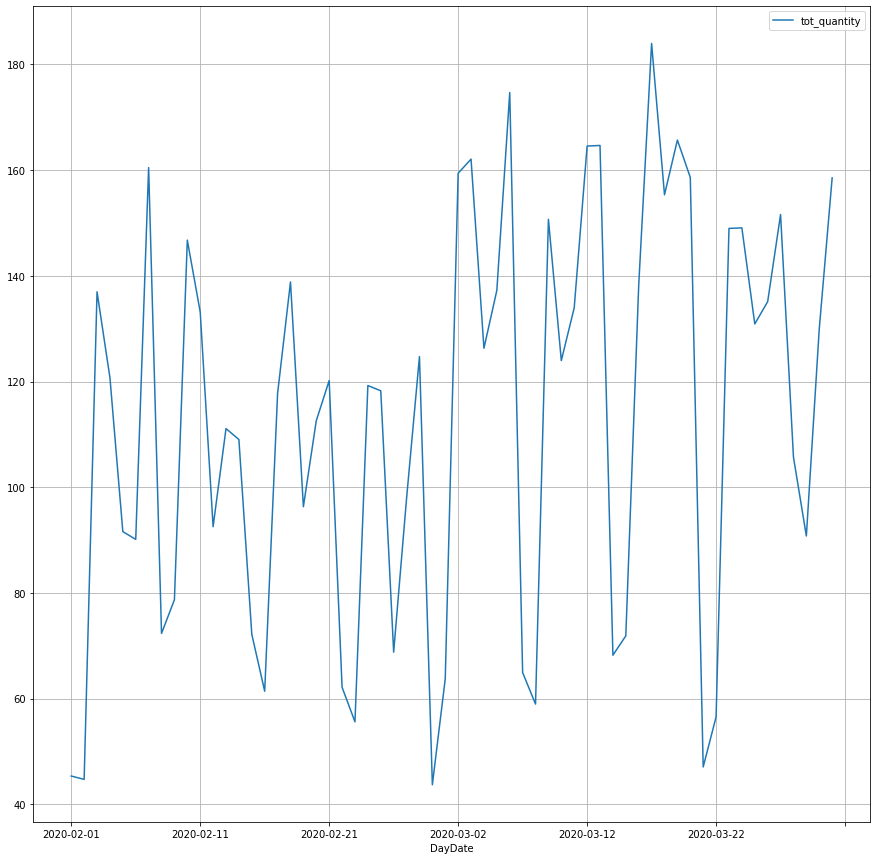

In [ ]:
final_data.plot(figsize = (15, 15), grid = True)

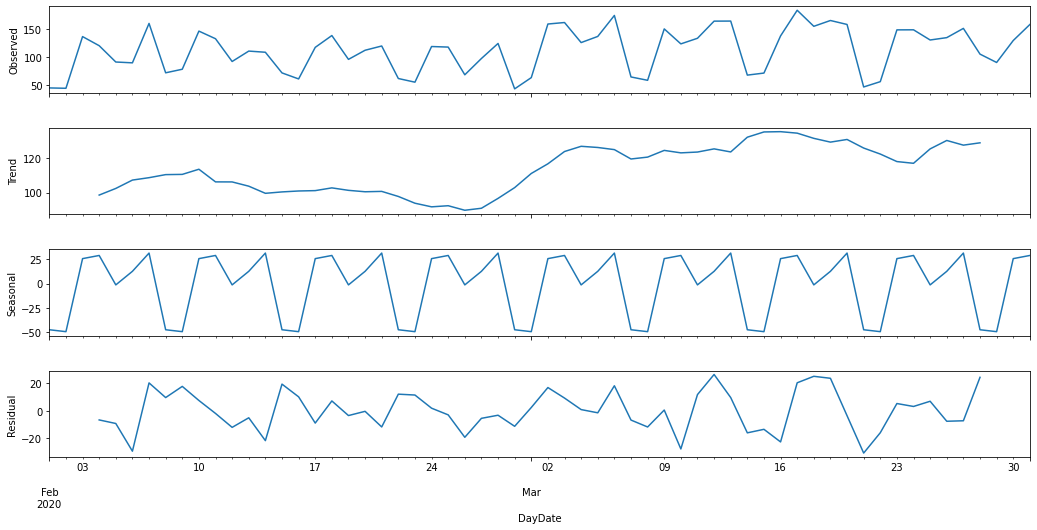

In [ ]:
# Plotting the additive model of time-series
import statsmodels.api as sm

final_data.reset_index(inplace = True)
final_data['DayDate'] = pd.to_datetime(final_data['DayDate'])
final_data = final_data.set_index('DayDate')

decomposition = sm.tsa.seasonal_decompose(final_data, model = "additive")
fig = decomposition.plot()
fig.set_size_inches((16, 9))